<a href="https://colab.research.google.com/github/1kaiser/ICESAT2/blob/main/ICESAT2_tracks_intersection_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prerequisite


![image](https://user-images.githubusercontent.com/26379748/236684646-3c4cdf56-0a79-46ec-b7d9-8f79b5757dce.png)



In [ ]:
list_A = ['https://n5eil02u.ecs.nsidc.org/esir/5000004058045/239104701/processed_ATL03_20211108045334_07141302_005_01.h5',
 'https://n5eil02u.ecs.nsidc.org/esir/5000004058045/226925046/processed_ATL03_20210627231818_00661206_005_01.h5',
 'https://n5eil02u.ecs.nsidc.org/esir/5000004058045/226819567/processed_ATL03_20210530004215_10111106_005_01.h5',
 'https://n5eil02u.ecs.nsidc.org/esir/5000004058045/226455818/processed_ATL03_20210208175352_07141002_005_01.h5',
 'https://n5eil02u.ecs.nsidc.org/esir/5000004058045/225517656/processed_ATL03_20200211111433_07140602_005_01.h5',
 'https://n5eil02u.ecs.nsidc.org/esir/5000004074543/224813989/processed_ATL03_20190427130425_04470306_005_01.h5',
 'https://n5eil02u.ecs.nsidc.org/esir/5000004074543/223502286/processed_ATL03_20190126172441_04470206_005_01.h5',
]

list_B = [
    'https://n5eil02u.ecs.nsidc.org/esir/5000004077220/223754368/processed_ATL03_20190213043533_07140202_005_01.h5',
    'https://n5eil02u.ecs.nsidc.org/esir/5000004077220/224821719/processed_ATL03_20190515001514_07140302_005_01.h5',
    'https://n5eil02u.ecs.nsidc.org/esir/5000004077220/225517656/processed_ATL03_20200211111433_07140602_005_01.h5',
    'https://n5eil02u.ecs.nsidc.org/esir/5000004077319/225806241/processed_ATL03_20200531180255_10110706_005_01.h5',
    'https://n5eil02u.ecs.nsidc.org/esir/5000004077220/226455818/processed_ATL03_20210208175352_07141002_005_01.h5',
    'https://n5eil02u.ecs.nsidc.org/esir/5000004077319/226819567/processed_ATL03_20210530004215_10111106_005_01.h5',
    'https://n5eil02u.ecs.nsidc.org/esir/5000004077220/239104701/processed_ATL03_20211108045334_07141302_005_01.h5',
]

for i in list_B:
  !wget --http-user=kroy0001 --http-password=/#j%kWrPA,8.HRe {i}


In [ ]:
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/ASTER_DEM.tif #getting the dem
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/pongdam_dem.tif #getting Pong Dam dem
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/landsat2.zip
!unzip '*.zip'
!rm -r *.zip

In [ ]:
!pip install geopandas
!pip install rasterio

# Plotting tracks and solutions

In [ ]:
#@title **Plotting 6 tracks of Track 1 and Track 2**{ vertical-output: true }
import matplotlib.patheffects as path_effects

# Define the file names and track names
filename_1 = "/content/processed_ATL03_20190213043533_07140202_005_01.h5" #@param {type:"string"}
filename_2 = "/content/processed_ATL03_20200531180255_10110706_005_01.h5" #@param {type:"string"}

track_names = ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]

# Loop through the track names and get the data
data = []
for i, tr in enumerate(track_names):
    try:
        h_ph_data1, lat1, lon1 = get_height_lat_lon(filename_1, tr)
        data.append((lon1, lat1, h_ph_data1, f"Track 1 {i+1} - {tr}"))
    except KeyError:
        print(f"Track {tr} not found in {filename_1}. Skipping...")

    try:
        h_ph_data2, lat2, lon2 = get_height_lat_lon(filename_2, tr)
        data.append((lon2, lat2, h_ph_data2, f"Track 2 {i+7} - {tr}"))
    except KeyError:
        print(f"Track {tr} not found in {filename_2}. Skipping...")

# Find the bounding box that covers all tracks with a buffer
min_lon, max_lon, min_lat, max_lat = float('inf'), float('-inf'), float('inf'), float('-inf')
for lon, lat, _, _ in data:
    min_lon = min(min(lon), min_lon)
    max_lon = max(max(lon), max_lon)
    min_lat = min(min(lat), min_lat)
    max_lat = max(max(lat), max_lat)

M_lon = (max_lon + min_lon)/2
M_lat = (max_lat + min_lat)/2
dx_boundary_x = max(max_lon - min_lon, max_lat - min_lat)

# Set the limits of the axis to the bounding box
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(M_lon - dx_boundary_x/2, M_lon + dx_boundary_x/2)
ax.set_ylim(M_lat - dx_boundary_x/2, M_lat + dx_boundary_x/2)

show(dem_in, cmap='gist_ncar', ax=ax)

# Plot each track separately with a label in the legend and annotate the label
# Plot only the first point of each track with a label in the legend and annotate the label
for lon, lat, h_ph_data, label in data:
    ax.scatter(lon, lat, s=1, marker='.', label=label)
    ax.annotate(label, (lon[0], lat[0]), xytext=(5, 5), textcoords='offset points', fontsize=8)


# Add a legend to the plot
ax.legend(loc='lower right', scatterpoints=10)

# Add axis labels and a title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Tracks 1-6 from File 1 and Tracks 7-12 from File 2')


In [ ]:
import h5py
import numpy as np
f = h5py.File('/content/processed_ATL03_20200531180255_10110706_005_01.h5', 'r')
len(np.array(f['gt1l/heights/signal_conf_ph']))
np.array(f['gt1l/heights/h_ph'])

In [ ]:
#@title **Plotting all files in combination of Track 1 and Track 2**{ vertical-output: true }
import glob
import itertools
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import h5py
import rasterio
from rasterio.plot import show
import numpy as np

dem_in = rasterio.open('/content/pongdam_dem.tif')
out_data = dem_in.read(1, masked=1)


# Define the track names
track_names = ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]
################################################################################
def get_height_lat_lon(filename, track_name):
  # Open the HDF5 file and extract data
  f = h5py.File(filename, 'r')
  h_ph_data = f['/'+str(track_name)+'/heights/h_ph']
  lat_ph_data = f['/'+str(track_name)+'/heights/lat_ph']
  lon_ph_data = f['/'+str(track_name)+'/heights/lon_ph']
  return h_ph_data, lat_ph_data, lon_ph_data
################################################################################
def plot_track_combinations(file1, file2, axs):
    # Loop through the track names and get the data
    data = []
    for i, tr in enumerate(track_names):
        try:
            h_ph_data1, lat1, lon1 = get_height_lat_lon(file1, tr)
            data.append((lon1, lat1, h_ph_data1, f"Track 1 {i+1} - {tr}"))
        except KeyError:
            print(f"Track {tr} not found in {file1}. Skipping...")

        try:
            h_ph_data2, lat2, lon2 = get_height_lat_lon(file2, tr)
            data.append((lon2, lat2, h_ph_data2, f"Track 2 {i+7} - {tr}"))
        except KeyError:
            print(f"Track {tr} not found in {file2}. Skipping...")

    # Find the bounding box that covers all tracks with a buffer
    min_lon, max_lon, min_lat, max_lat = float('inf'), float('-inf'), float('inf'), float('-inf')
    for lon, lat, _, _ in data:
        lon = np.array(lon)
        lat = np.array(lat)
        min_lon = min(np.min(lon), min_lon)
        max_lon = max(np.max(lon), max_lon)
        min_lat = min(np.min(lat), min_lat)
        max_lat = max(np.max(lat), max_lat)

    M_lon = (max_lon + min_lon)/2
    M_lat = (max_lat + min_lat)/2
    dx_boundary_x = max(max_lon - min_lon, max_lat - min_lat)

    # Set the limits of the axis to the bounding box
    axs.set_xlim(M_lon - dx_boundary_x/2, M_lon + dx_boundary_x/2)
    axs.set_ylim(M_lat - dx_boundary_x/2, M_lat + dx_boundary_x/2)

    show(dem_in, cmap='gist_ncar', ax=axs)

    # Plot each track separately with a label in the legend and annotate the label
    # Plot only the first point of each track with a label in the legend and annotate the label
    for lon, lat, h_ph_data, label in data:
        axs.scatter(lon, lat, s=1, marker='.', label=label)
        # axs.annotate(label, (lon[len(lon)/2], lat[len(lat)/2]), xytext=(5, 5), textcoords='offset points', fontsize=8)
        axs.annotate(label, (lon[len(lon)//2], lat[len(lat)//2]), xytext=(5, 5), textcoords='offset points', fontsize=8, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    # Add a legend to the plot
    axs.legend(loc='lower right', scatterpoints=10)

    # Add axis labels and a title
    axs.set_xlabel('Longitude')
    axs.set_ylabel('Latitude')
    axs.set_title(f"Tracks 1-6 from {file1} \n and Tracks 7-12 from {file2}")

# Find all files with a .h5 extension in the current directory
files = glob.glob("*.h5")

combinations = set()
for f1, f2 in itertools.combinations(files, 2):
    if (f2, f1) not in combinations:
        combinations.add((f1, f2))

# Determine the number of possible combinations and set the number of rows and columns
num_combinations = len(list(combinations))
nrows = int(num_combinations**0.5) + 1
ncols = int(num_combinations/nrows) + 1

# Create a figure with subplots for each combination
fig, axs = plt.subplots(nrows, ncols, figsize=(100, 100))

for i, (file1, file2) in enumerate(combinations):
    row = i // ncols
    col = i % ncols
    index1 = row * nrows + col
    index2 = col * nrows + row
    print(f"({row},{col}): {file1} {file2}")
    plot_track_combinations(file1, file2, axs[row, col])
  

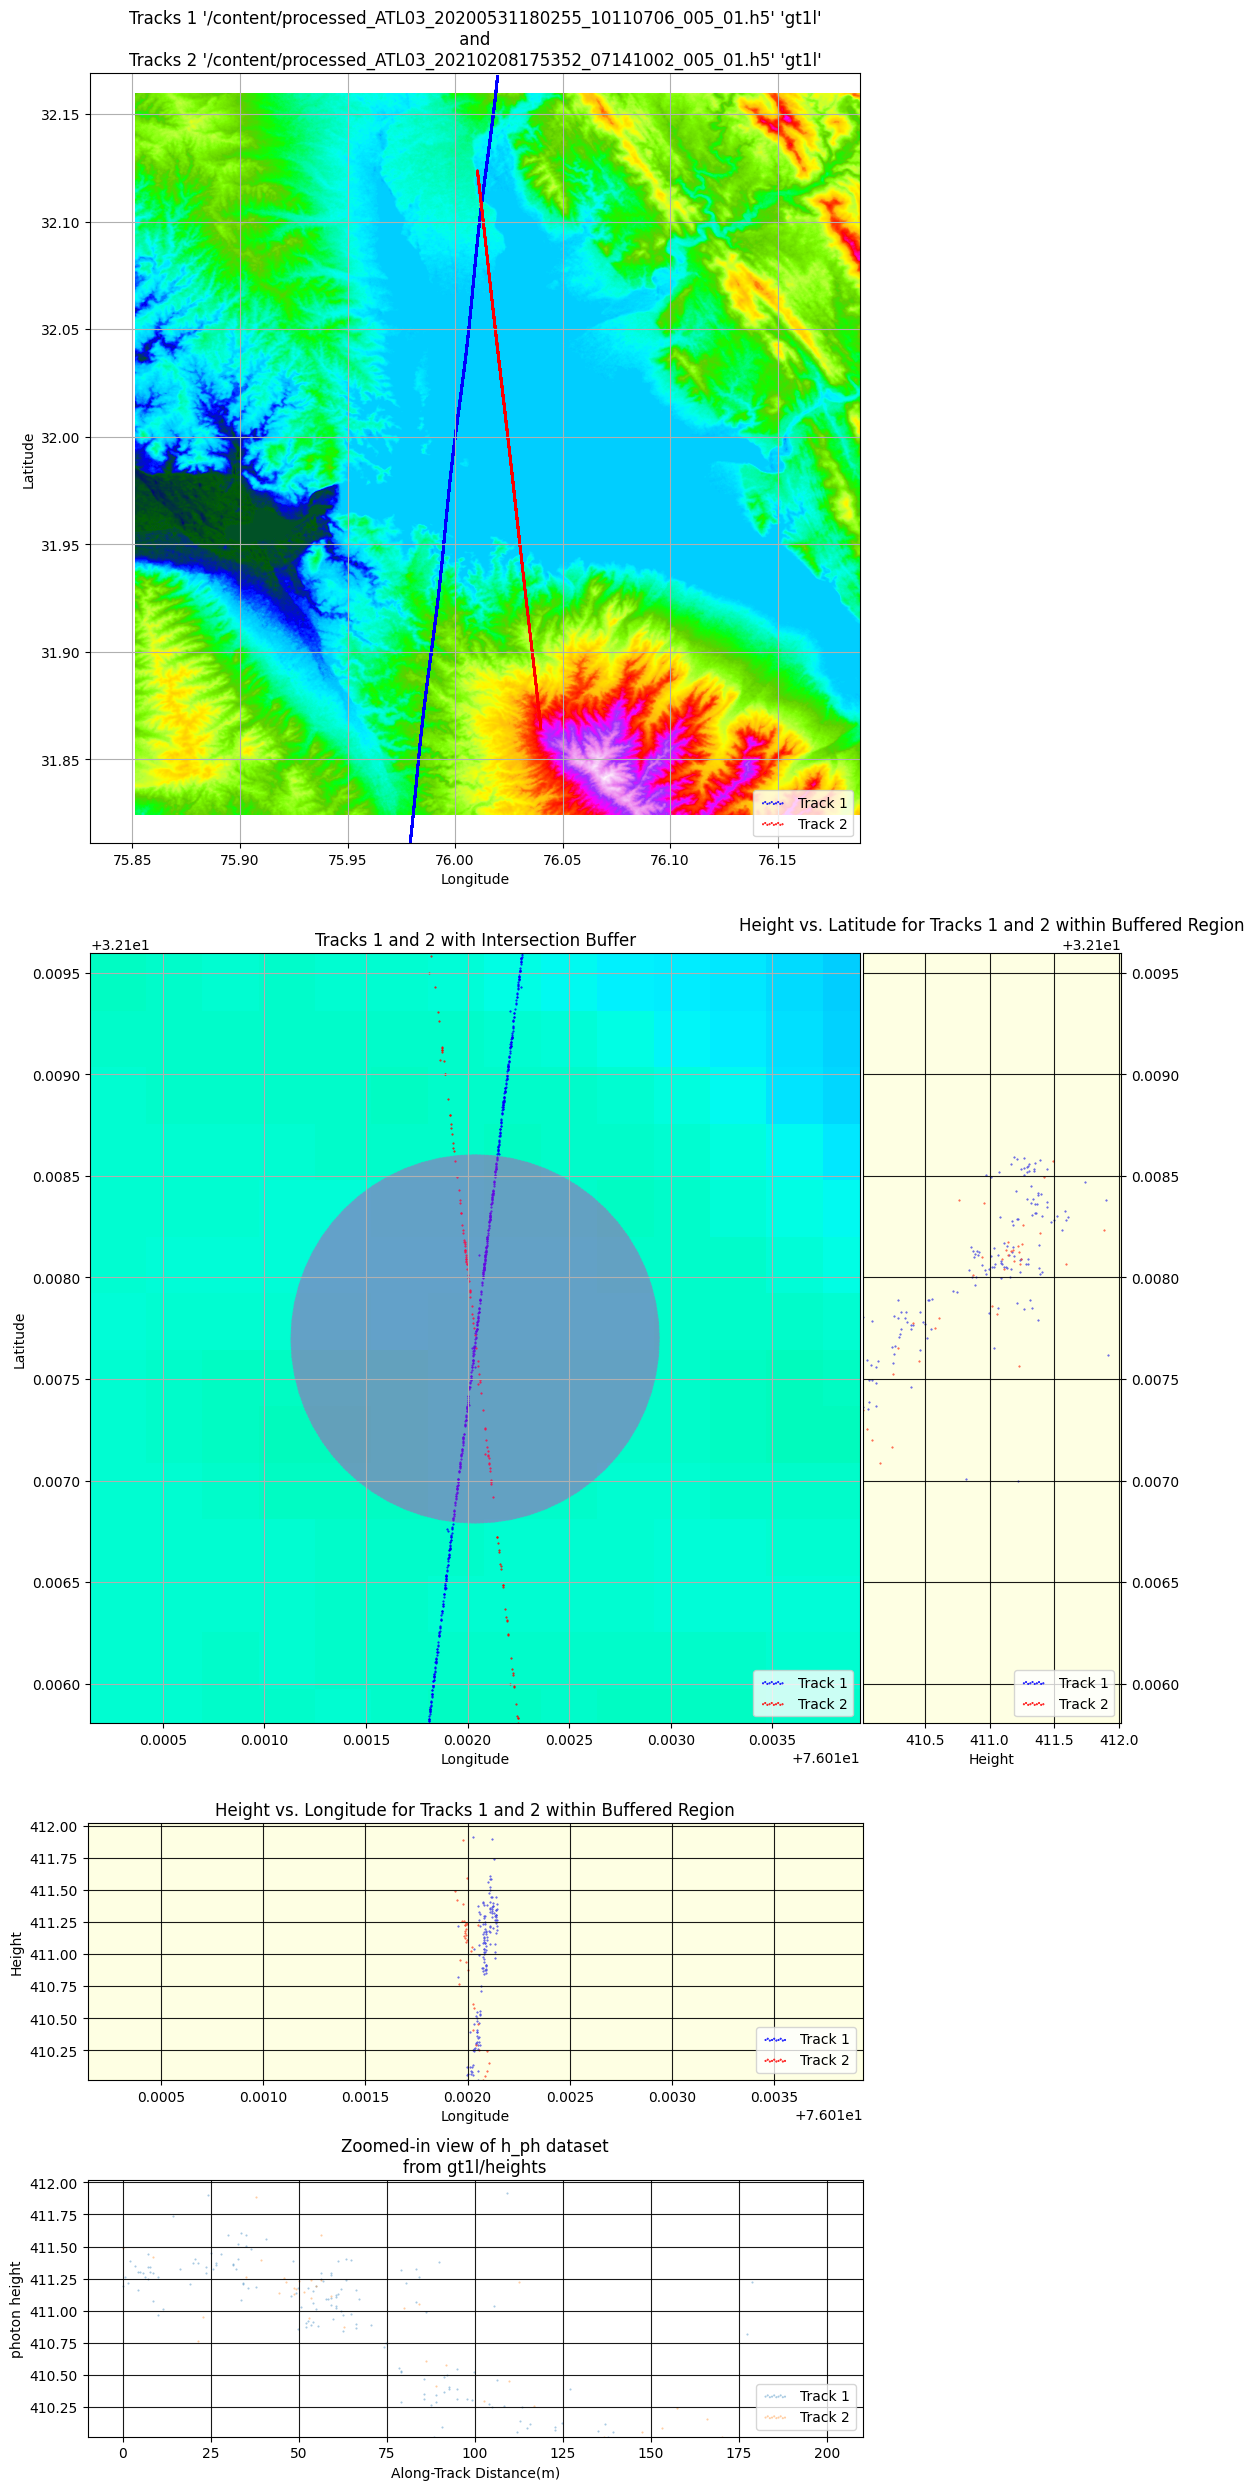

In [115]:
import rasterio
from rasterio.plot import show

dem_in = rasterio.open('/content/pongdam_dem.tif')
out_data = dem_in.read(1, masked=1)

import numpy as np
import matplotlib.pyplot as plt
#@title **tracks buffer plot with its intersections at centre as well as height vs lat/lon of the buffered region**{ vertical-output: true }
fsize = 10
filename_1 = "/content/processed_ATL03_20200531180255_10110706_005_01.h5" #@param {type:"string"}
filename_2 = "/content/processed_ATL03_20210208175352_07141002_005_01.h5" #@param {type:"string"}
tr_1 = "gt1l" #@param ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]
tr_2 = "gt1l" #@param ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]


import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import jax.numpy as jnp
################################################################################
# Calculate distance along track using haversine formula
def haversine(lat1, lon1, lat2, lon2):
  R = 6371.0  # Earth radius in km
  dLat = np.radians(lat2 - lat1)
  dLon = np.radians(lon2 - lon1)
  lat1 = np.radians(lat1)
  lat2 = np.radians(lat2)
  a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
  c = 2*np.arcsin(np.sqrt(a))
  return R*c*1000.0
################################################################################
def get_height_lat_lon(filename, track_name):
  # Open the HDF5 file and extract data
  f = h5py.File(filename, 'r')
  h_ph_data = f['/'+str(track_name)+'/heights/h_ph']
  lat_ph_data = f['/'+str(track_name)+'/heights/lat_ph']
  lon_ph_data = f['/'+str(track_name)+'/heights/lon_ph']
  return h_ph_data, lat_ph_data, lon_ph_data
################################################################################
h_ph_data1, lat1, lon1 = get_height_lat_lon(filename_1, tr_1)
h_ph_data2, lat2, lon2 = get_height_lat_lon(filename_2, tr_2)
################################################################################
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
pos = ax.get_position()
w_x, h_y = pos.width, pos.height
################################################################################plotting complete dem and track
lat_1x = np.array(lat1)
lon_1x = np.array(lon1)
lat_2x = np.array(lat2)
lon_2x = np.array(lon2)

# Find the bounding box that covers both tracks with a buffer
min_lon = min(min(lon_1x), min(lon_2x)) - 0.001
max_lon = max(max(lon_1x), max(lon_2x)) + 0.001
min_lat = min(min(lat_1x), min(lat_2x)) - 0.001
max_lat = max(max(lat_1x), max(lat_2x)) + 0.001
M_lon = (max_lon + min_lon)/2
M_lat = (max_lat + min_lat)/2
dx_boundary_x = max(max_lon - min_lon, max_lat - min_lat)
# Set the limits of the axis to the bounding box
ax.set_xlim(M_lon - dx_boundary_x/2, M_lon + dx_boundary_x/2)
ax.set_ylim(M_lat - dx_boundary_x/2, M_lat + dx_boundary_x/2)
show(dem_in, cmap='gist_ncar', ax=ax)                            #plotting the dem over which the track points can be plotted
# Add a grid to the plot
ax.grid(True)

# Add a legend to the plot
# Add axis labels and a title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f"Tracks 1 '{filename_1}' '{tr_1}'\n and \nTracks 2 '{filename_2}' '{tr_2}'")
################################################################################
lat_1 = np.array(lat1)
lon_1 = np.array(lon1)
lat_2 = np.array(lat2)
lon_2 = np.array(lon2)
################################################################################
from shapely.geometry import Point
from shapely.ops import unary_union
from shapely.geometry import LineString

# Convert the latitudes and longitudes to shapely Point objects
points_1 = [Point(lon, lat) for lat, lon in zip(lat_1, lon_1)]
points_2 = [Point(lon, lat) for lat, lon in zip(lat_2, lon_2)]

# Find the intersection of the two tracks
intersection = unary_union([LineString(points_1).intersection(LineString(points_2))])
buffer_region_in_meters = 100 #@param {type:"raw"} # in meters
buffer_region = 1/(110 * 1000)* buffer_region_in_meters

# Create a buffer around the intersection point
intersection_buffer = intersection.buffer(buffer_region)
#@title **track in the buffered region with altitude/elevatoion/height buffer control for points visibility with track labels** { vertical-output: true }
# Compute the median height of the tracks within the buffered region
import geopandas as gpd

# Create a GeoDataFrame for the buffered intersection
intersection_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(intersection_buffer))

# Create a mask for selecting points within the buffered region
mask_1 = [intersection_buffer.contains(point) for point in points_1]
mask_2 = [intersection_buffer.contains(point) for point in points_2]

# Select the latitudes, longitudes, and heights within the buffered region for each track
lat_1_buf = lat_1[mask_1]
lon_1_buf = lon_1[mask_1]
height_1_buf = np.array(h_ph_data1)[mask_1]

lat_2_buf = lat_2[mask_2]
lon_2_buf = lon_2[mask_2]
height_2_buf = np.array(h_ph_data2)[mask_2]

##########################################################
# Set the limits of the axis to the bounding box
# Find the bounding box that covers both tracks with a buffer
min_lon = min(min(lon_1_buf), min(lon_2_buf)) - 0.001
max_lon = max(max(lon_1_buf), max(lon_2_buf)) + 0.001
min_lat = min(min(lat_1_buf), min(lat_2_buf)) - 0.001
max_lat = max(max(lat_1_buf), max(lat_2_buf)) + 0.001
M_lon = (max_lon + min_lon)/2
M_lat = (max_lat + min_lat)/2
dx_boundary = max(max_lon - min_lon, max_lat - min_lat)
###########################################################
################################################################################
ax2 = fig.add_axes([0.5 -w_x/2 , 0-h_y , w_x , h_y])
ax2.set_position([pos.x0 , 0-h_y, pos.width, h_y])
#********************************
pos = ax2.get_position()
w_x, h_y = pos.width, pos.height
#********************************

x, y = intersection_buffer.exterior.xy

ax.fill(x, y, alpha=0.6, fc='#fa19b6', ec='#fcc603', linestyle='--', linewidth=1)
ax.scatter(lon_1x, lat_1x, s=1, color='blue', marker='.', label = 'Track 1')
ax.scatter(lon_2x, lat_2x, s=1, color='r', marker='.', label = 'Track 2')
ax.legend(loc='lower right', scatterpoints=10)

show(dem_in, cmap='gist_ncar', ax=ax2)                    #showing the dem on which the tracks will be  plotted

ax2.scatter(lon_1, lat_1,  marker='.', color='blue', s=1, label='Track 1')
ax2.scatter(lon_2, lat_2,  marker='.', color='red', s=1, label='Track 2')
ax2.fill(x, y, alpha=0.4, fc='#fa19b6', ec='#03fcc6', linestyle='dotted', linewidth=1)

ax2.set_xlim(M_lon - dx_boundary/2, M_lon + dx_boundary/2)
ax2.set_ylim(M_lat - dx_boundary/2, M_lat + dx_boundary/2)

ax2.grid(True)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Tracks 1 and 2 with Intersection Buffer')
ax2.legend(['Track 1', 'Track 2'], loc='lower right', scatterpoints=10)
################################################################################< elevation vs latitude
median_height = np.median(np.concatenate((height_1_buf, height_2_buf)))
buffer_height = 1 #@param {type:"raw"}

ax3 = fig.add_axes([0.5 -w_x/2 , 0-h_y , w_x , h_y], sharey=ax2)
ax3.set_position([pos.x0 + pos.width , pos.y0 , w_x/3, pos.height])

ax3.scatter(height_1_buf, lat_1_buf,  marker='.', color='blue', s=1, label='Track 1')
ax3.scatter(height_2_buf, lat_2_buf,  marker='.', color='red', s=1, label='Track 2')
ax3.set_xlim(M_lat - dx_boundary/2, M_lat + dx_boundary/2)
ax3.axvspan(median_height - buffer_height, median_height + buffer_height, color='#fdffa3', alpha=0.3)
ax3.yaxis.set_label_position('right')
ax3.yaxis.tick_right()
ax3.set_ylabel('Y-axis label', visible=False)
ax3.set_xlim([median_height - buffer_height, median_height + buffer_height])
ax3.set_xlabel('Height')
ax3.set_ylabel('Latitude')
ax3.set_title('Height vs. Latitude for Tracks 1 and 2 within Buffered Region')
ax3.grid(True,  color='black', alpha = 0.9)
ax3.legend(loc='lower right', scatterpoints=10)
################################################################################< elevation vs longitude
ax4 = fig.add_axes([0 , 0 , w_x , h_y/3], sharex=ax2)
ax4.set_position([pos.x0 , pos.y0 - h_y/3 -0.1, pos.width, h_y/3])

ax4.scatter(lon_1_buf, height_1_buf,  marker='.', color='blue', s=1, label='Track 1')
ax4.scatter(lon_2_buf, height_2_buf,  marker='.', color='red', s=1, label='Track 2')
ax4.set_xlim(M_lon - dx_boundary/2, M_lon + dx_boundary/2)
ax4.axhspan(median_height - buffer_height, median_height + buffer_height, color='#fdffa3', alpha=0.3)
ax4.set_ylim([median_height - buffer_height, median_height + buffer_height])
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Height')
ax4.set_title('Height vs. Longitude for Tracks 1 and 2 within Buffered Region', loc='center').set_position([.5, 1.01])
ax4.grid(True,  color='black', alpha = 0.9)
ax4.legend(loc='lower right', scatterpoints=10)
################################################################################< elevation vs track 1 & 2 distances
ax5 = fig.add_axes([0.5 - w_x/2 , -h_y - h_y/3 -h_y/3 , w_x , h_y/3])
ax5.set_position([pos.x0 ,-h_y - h_y/3 -h_y/3 - 0.1 * 2, pos.width, h_y/3])

dist_ph_along_data_1 = [haversine(lat_1_buf[0], lon_1_buf[0], lat_1_buf[i], lon_1_buf[i]) for i in range(len(lat_1_buf))]

lats = np.flip(lat_2_buf)
longs = np.flip(lon_2_buf)
heights = np.flip(height_2_buf)

dist_ph_along_data_2 = [haversine(lats[0], longs[0], lats[i], longs[i]) for i in range(len(lats))]
ax5.scatter(np.array(dist_ph_along_data_1), np.array(height_1_buf),  marker= '.', s=1, alpha= 0.4, label = "Track 1")
ax5.scatter(np.array(dist_ph_along_data_2), np.array(heights),  marker= '.', s=1, alpha= 0.4, label = "Track 2")

ax5.set_ylim([median_height - buffer_height, median_height + buffer_height])
ax5.set_xlabel('Along-Track Distance(m)')
ax5.set_ylabel('photon height')
ax5.set_title('Zoomed-in view of h_ph dataset\nfrom gt1l/heights', loc='center')
ax5.grid(True,  color='black', alpha = 0.9)
ax5.legend(loc='lower right', scatterpoints=10)

# Show the plot
plt.subplots_adjust(hspace=0)
plt.show()


testing ellipsiod height to orthometruc height conversion

# transform

**once we get the `lat_1_buf`, `lon_1_buf`& `height_1_buf` then we can save it in *Point cloud* numpy format as `point_cloud.npy` for the purposeof point cloud classification and other things**

In [ ]:
len(np.array(lat_1_buf))

In [116]:
import numpy as np

# Define your lat, lon, and height arrays
lat_array = lat_1_buf
lon_array = lon_1_buf
height_array = height_1_buf

# Combine the arrays into a single NumPy array
point_cloud_array = np.column_stack((lon_array, lat_array, height_array))

# Save the NumPy array to a file using np.save()
np.save('point_cloud.npy', point_cloud_array)


testing graph cut

In [ ]:
data = np.load('/content/point_cloud.npy')
data.shape

In [ ]:
!pip install igraph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_cut_distance_threshold(G, threshold):
    # Create two sets, S and T, where S contains only the source node
    S = set(["source"])
    T = set(G.nodes()) - S

    # While there are still nodes in T that are reachable from the source
    while any(nx.has_path(G, "source", target=t) for t in T):
        # Find the shortest path from the source to a node in T
        path = None
        for t in T:
            try:
                p = nx.shortest_path(G, "source", t)
                if nx.shortest_path_length(G, "source", t) <= threshold:
                    path = p
                    break
            except nx.NetworkXNoPath:
                pass
        
        # Check if the distance to the end node of the path is greater than the threshold
        if path is None or nx.shortest_path_length(G, "source", path[-1]) > threshold:
            break

        # Remove the path nodes from T and add them to S
        for node in path:
            T.remove(node)
            S.add(node)

    # Plot the result
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=S, node_color='r')
    nx.draw_networkx_nodes(G, pos, nodelist=T, node_color='b')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Test the function with a sample graph
G = nx.Graph()
G.add_node("source")
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])
graph_cut_distance_threshold(G, 2)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def graph_cut_distance_threshold(G, threshold):
    # Create two sets, S and T, where S contains only the source node
    S = set(["source"])
    T = set(G.nodes()) - S

    # While there are still nodes in T that are reachable from the source
    while any(nx.has_path(G, "source", target=t) for t in T):
        # Find the shortest path from the source to a node in T
        path = None
        for t in T:
            try:
                p = nx.shortest_path(G, "source", t)
                if nx.shortest_path_length(G, "source", t) <= threshold:
                    path = p
                    break
            except nx.NetworkXNoPath:
                pass
        
        # Check if the distance to the end node of the path is greater than the threshold
        if path is None or nx.shortest_path_length(G, "source", path[-1]) > threshold:
            break

        # Remove the path nodes from T and add them to S
        for node in path:
            T.remove(node)
            S.add(node)

    # Plot the result
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=S, node_color='r')
    nx.draw_networkx_nodes(G, pos, nodelist=T, node_color='b')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Test the function with a sample graph with random number of nodes
G = nx.Graph()
G.add_node("source")
num_nodes = random.randint(5, 100)
G.add_nodes_from(range(1, num_nodes+1))
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5),(3,20),(20,50)])
graph_cut_distance_threshold(G, 6)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def graph_cut_distance_threshold(G, threshold):
    # Create two sets, S and T, where S contains only the source node
    S = set(["source"])
    T = set(G.nodes()) - S

    # While there are still nodes in T that are reachable from the source
    while any(nx.has_path(G, "source", target=t) for t in T):
        # Find the shortest path from the source to a node in T
        path = None
        for t in T:
            try:
                p = nx.shortest_path(G, "source", t)
                if nx.shortest_path_length(G, "source", t) <= threshold:
                    path = p
                    break
            except nx.NetworkXNoPath:
                pass
        
        # Check if the distance to the end node of the path is greater than the threshold
        if path is None or nx.shortest_path_length(G, "source", path[-1]) > threshold:
            break

        # Remove the path nodes from T and add them to S
        for node in path:
            T.remove(node)
            S.add(node)

    # Plot the result
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=S, node_color='r')
    nx.draw_networkx_nodes(G, pos, nodelist=T, node_color='b')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Test the function with a sample graph with random number of nodes and edges
G = nx.Graph()
G.add_node("source")
num_nodes = random.randint(5, 100)
G.add_nodes_from(range(1, num_nodes+1))

# Randomly connect edges between nodes
for i in range(1, num_nodes+1):
    for j in range(i+1, num_nodes+1):
        if random.random() < 10.5:
            G.add_edge(i, j)

graph_cut_distance_threshold(G, 2)


In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Generate 100 random points in a 2D plane
points = np.random.rand(100, 2)

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)
plt.show()


In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

import numpy as np

# Define haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R*c*1000.0

# Load data from .npy file
data = np.load('/content/point_cloud.npy')

# Compute distances from longitude and latitude
distances = np.zeros((data.shape[0],), dtype=float)
for i in range(1, data.shape[0]):
    distances[i] = haversine(data[i-1,0], data[i-1,1], data[i,0], data[i,1])

# Combine distances and elevation into a 2D array
coords = np.column_stack((distances, data[:,2]))

# Compute Voronoi diagram
vor = Voronoi(coords)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)
ax.grid(True,  color='black', alpha = 0.9)
plt.show()


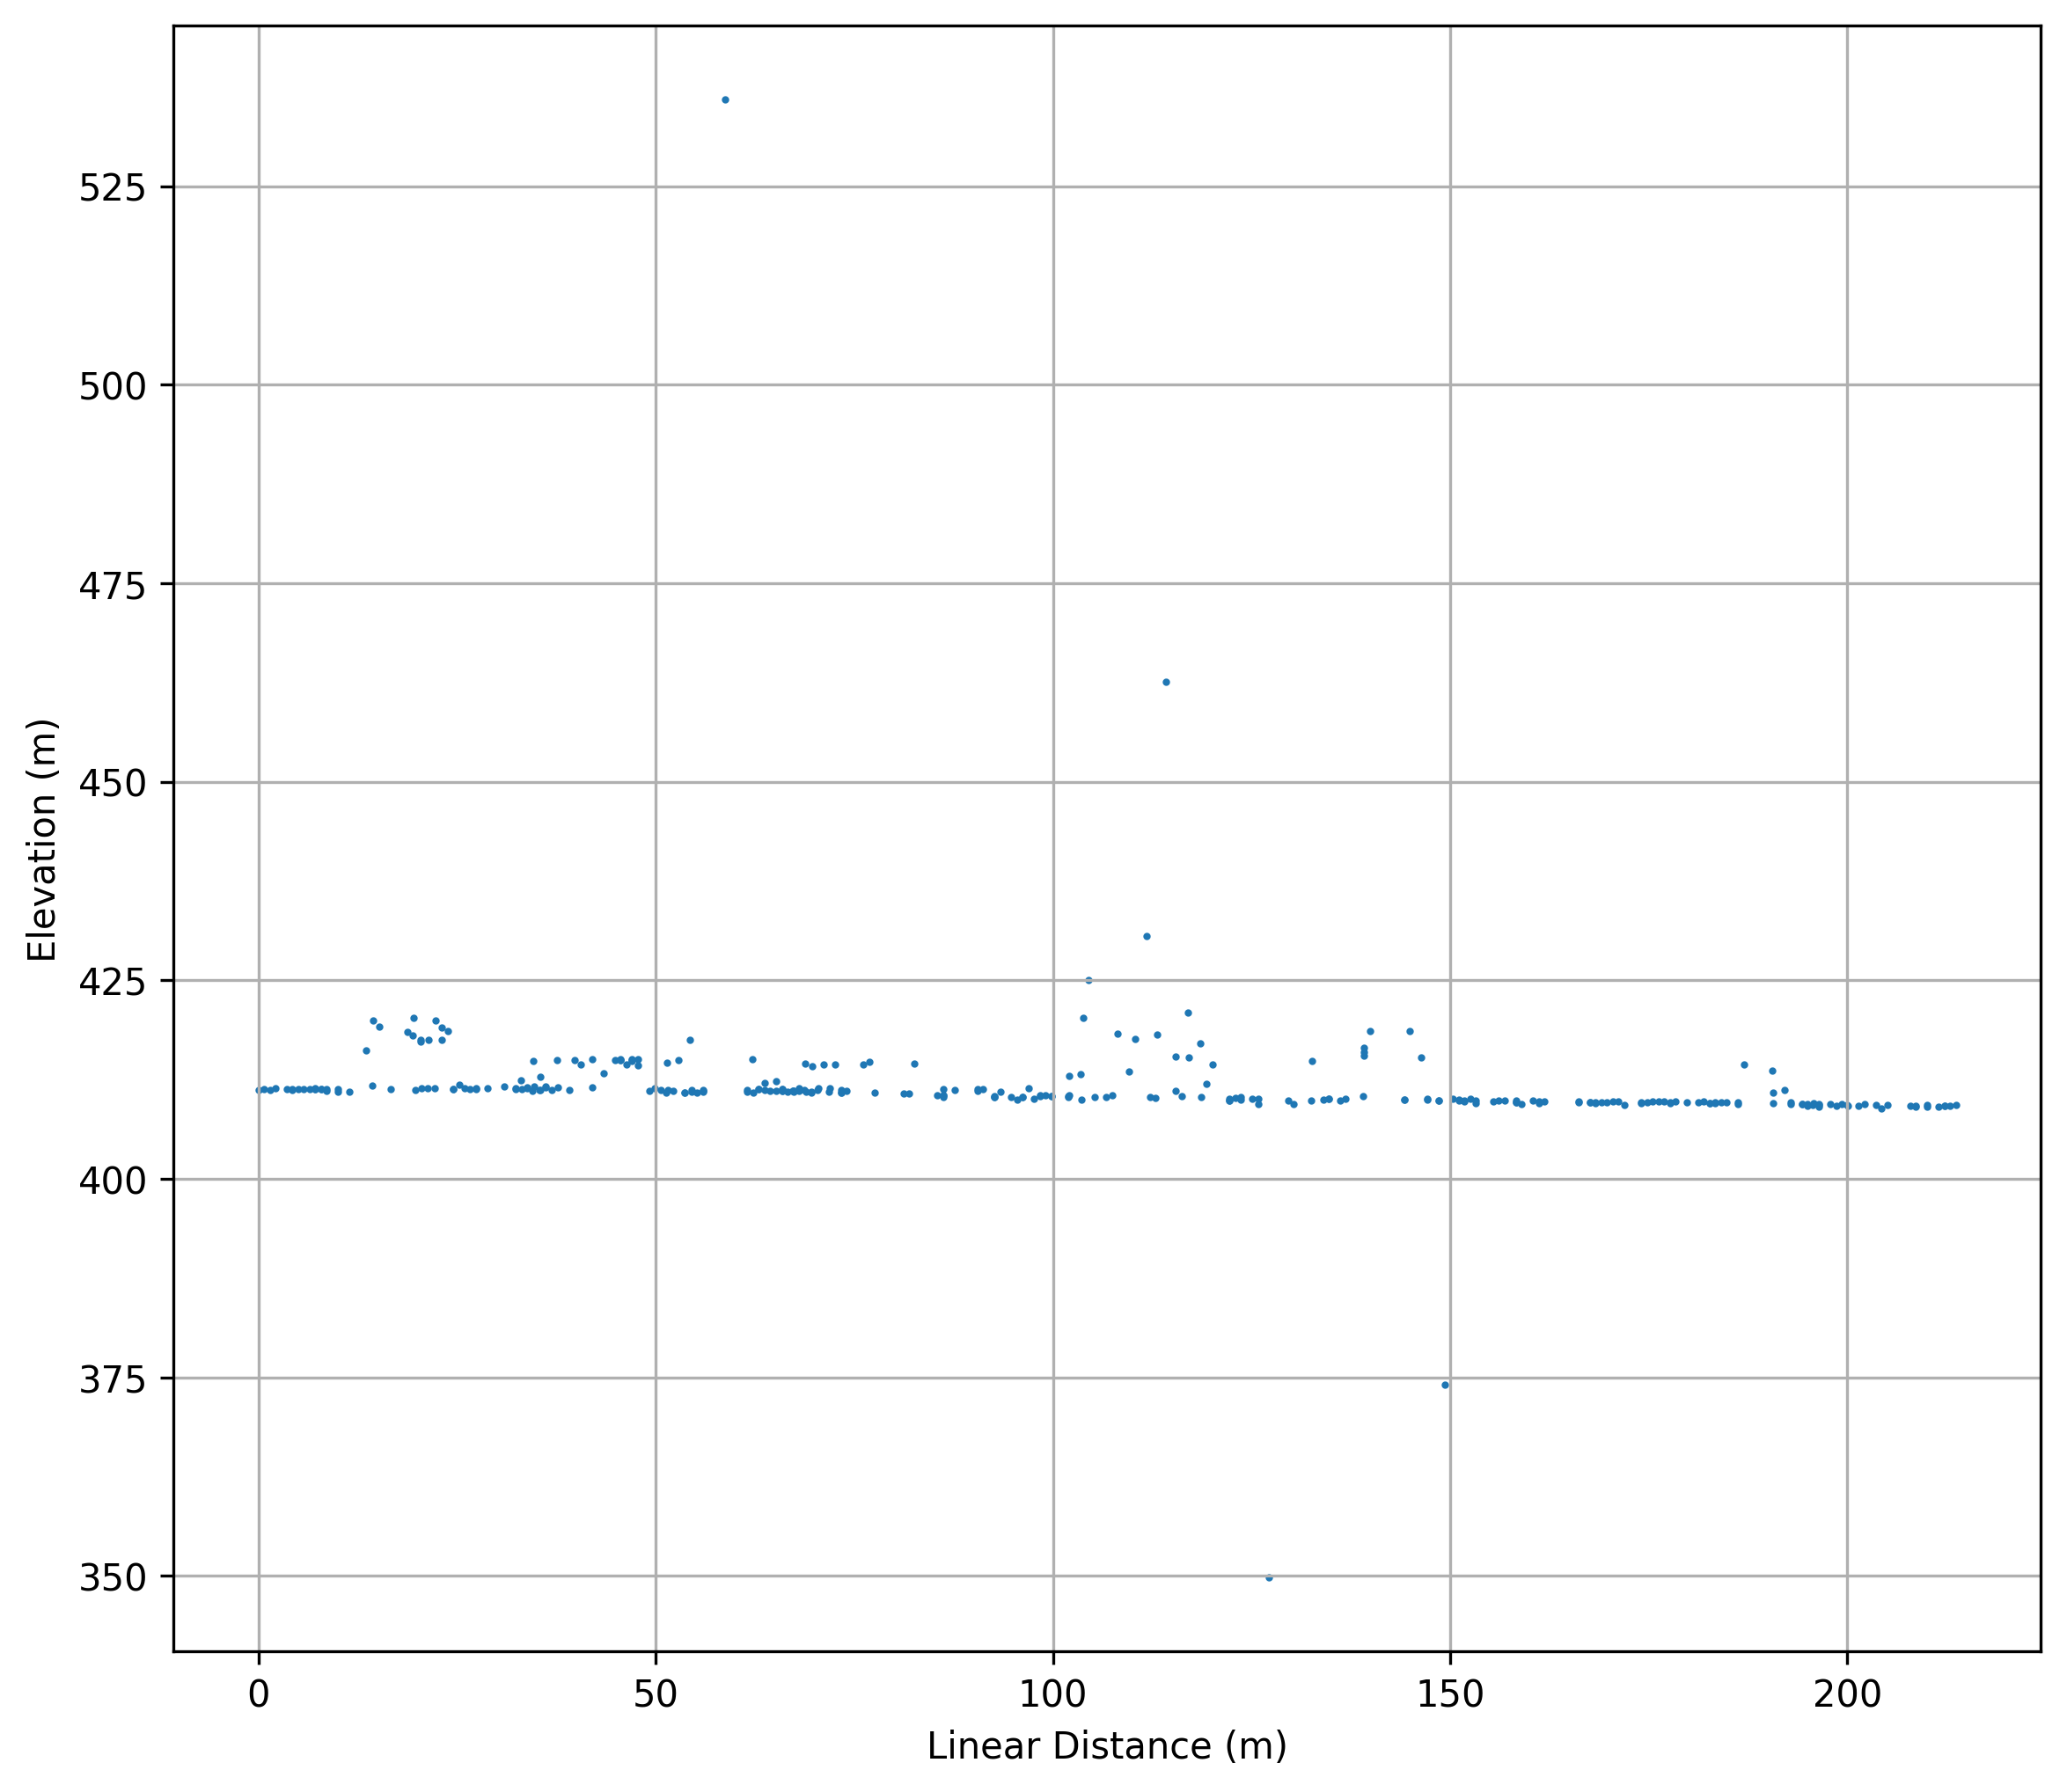

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R*c*1000.0

# Load data from .npy file
data = np.load('/content/point_cloud.npy')

# Extract latitude, longitude, and elevation data
lon = data[:,0]
lat = data[:,1]
elev = data[:,2]

# Calculate linear distance between points
dist = np.zeros_like(lat)
for i in range(1, len(lat)):
    dist[i] = dist[i-1] + haversine(lat[i-1], lon[i-1], lat[i], lon[i])

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 8), dpi = 300)
ax.scatter(dist, elev, s= 1)
ax.set_aspect('equal')
ax.set_xlabel('Linear Distance (m)')
ax.set_ylabel('Elevation (m)')
ax.grid(True)
plt.show()


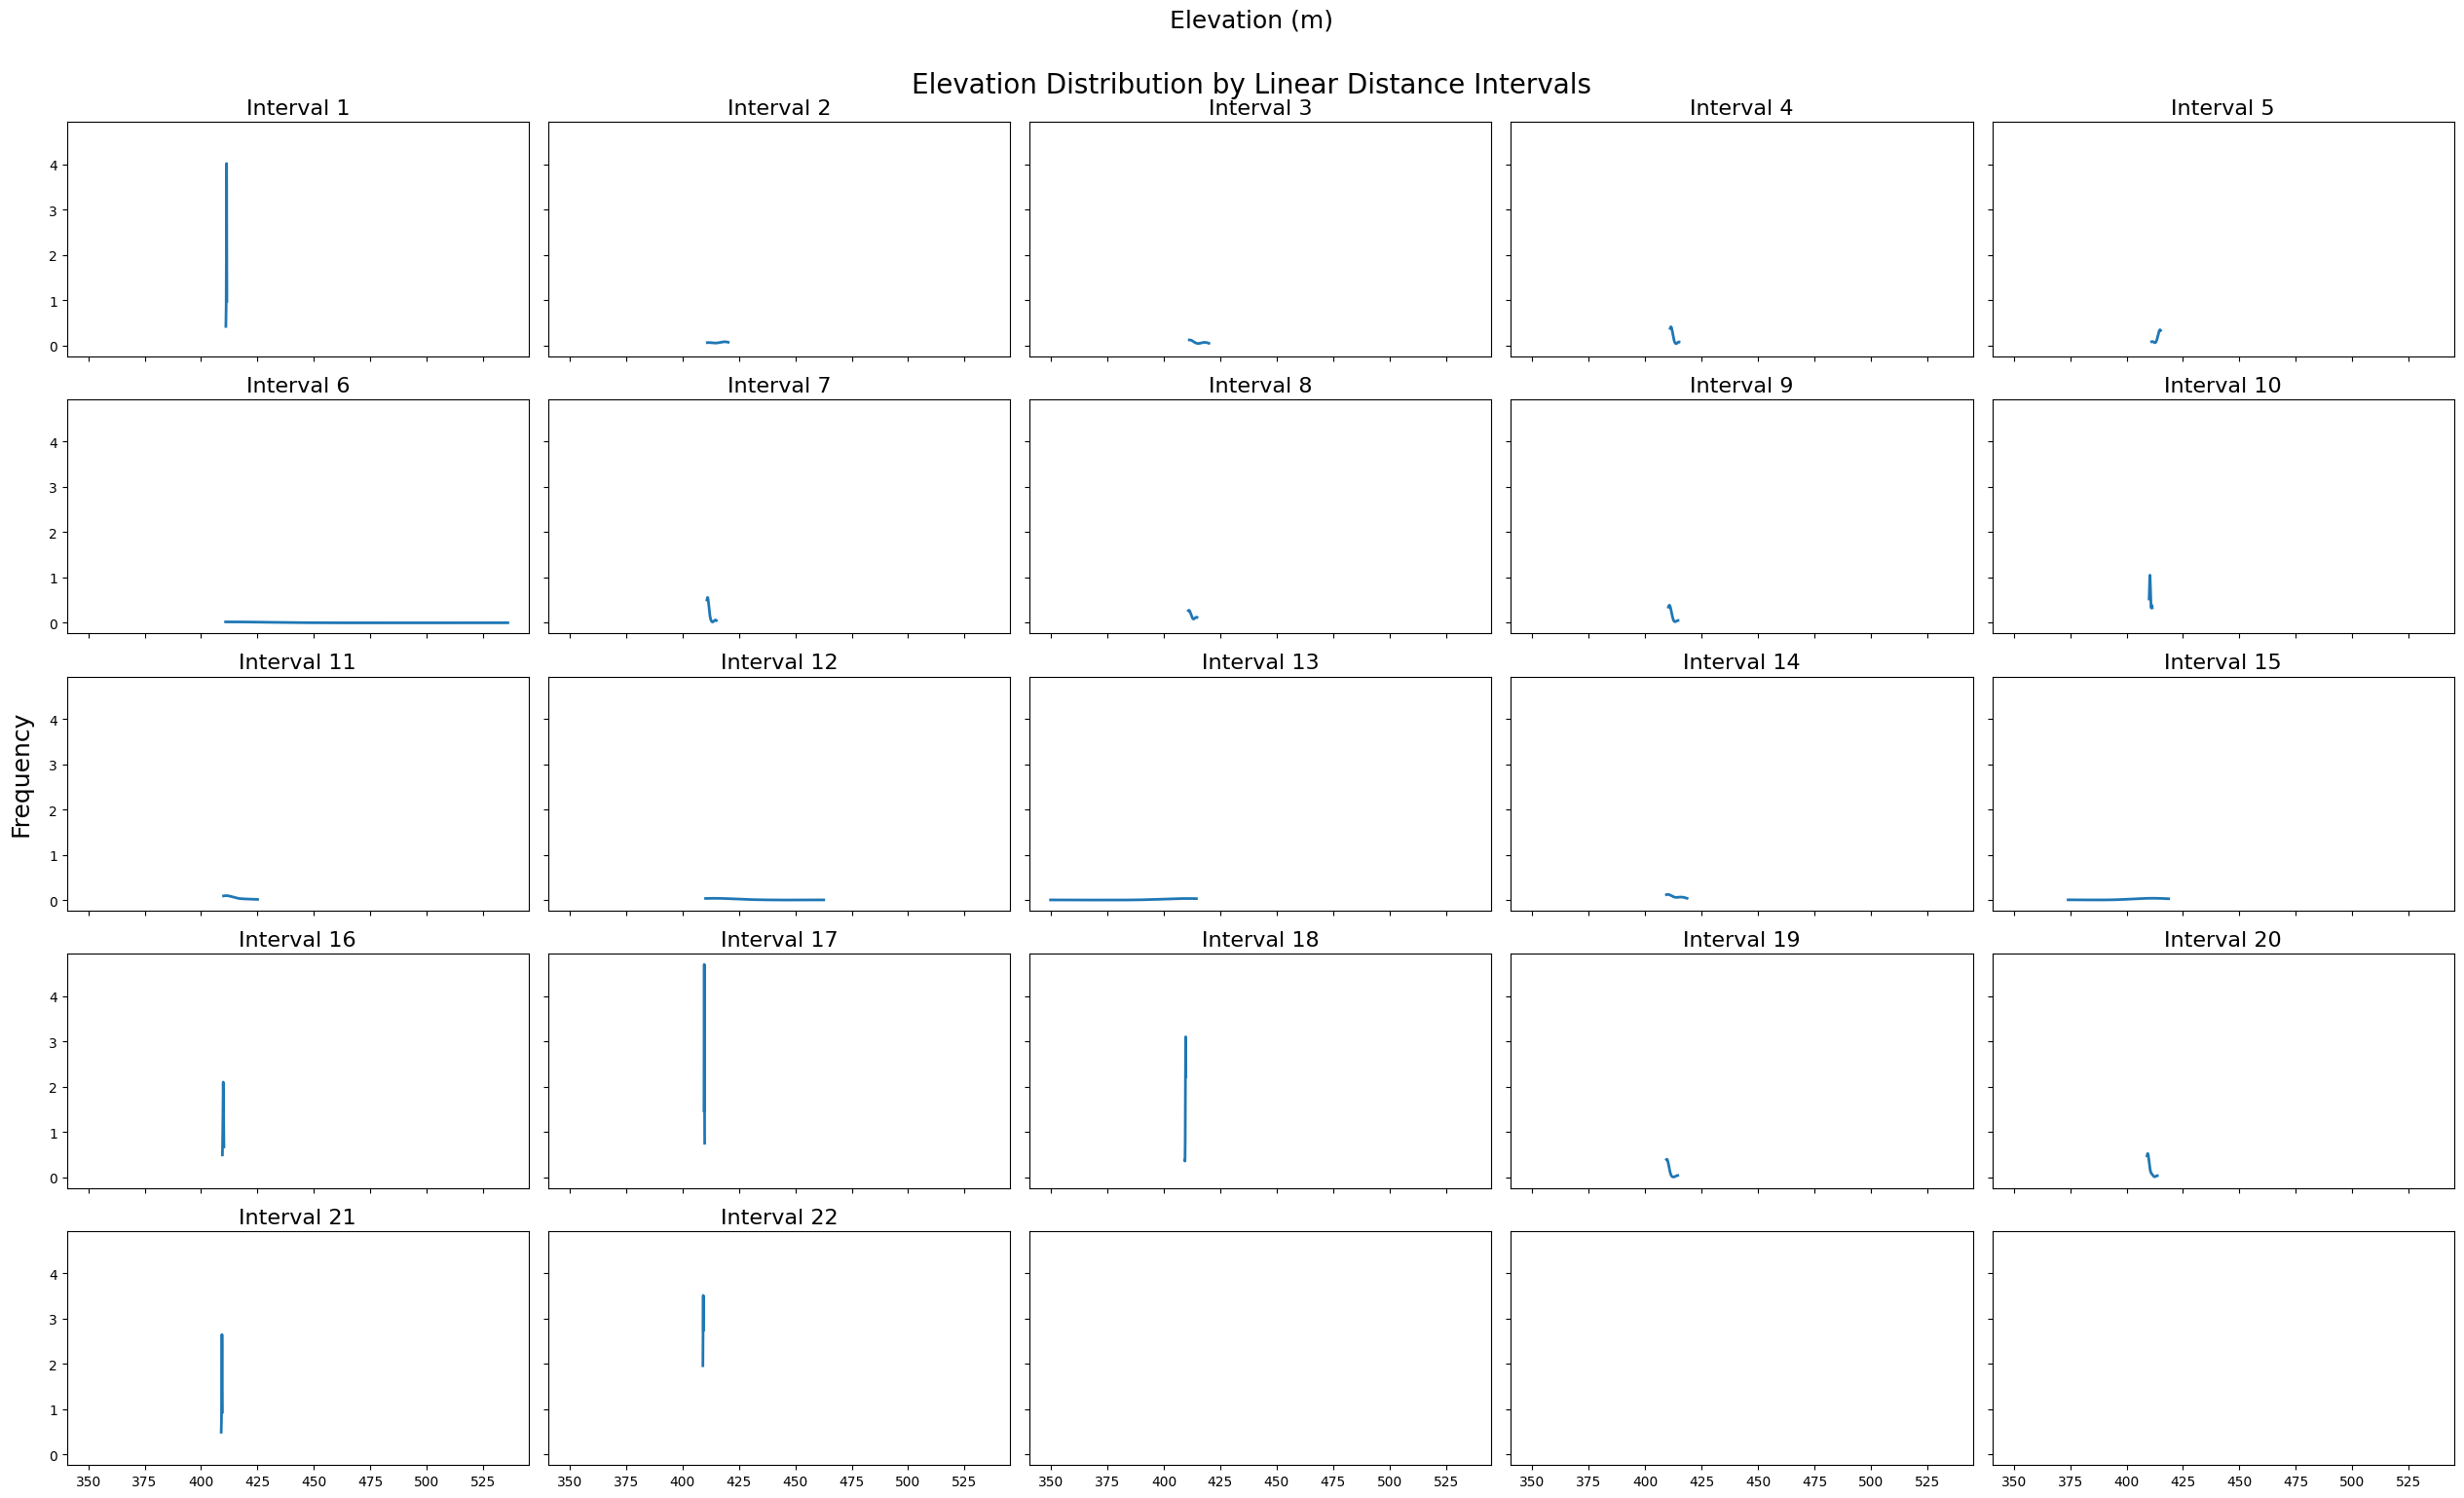

In [122]:
import matplotlib.pyplot as plt

# Define haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R*c*1000.0

# Load data from .npy file
data = np.load('/content/point_cloud.npy')

# Extract latitude, longitude, and elevation data
lon, lat, elev = data[:,0], data[:,1], data[:,2]

# Calculate linear distance between points
dist = np.zeros_like(lat)
for i in range(1, len(lat)):
    dist[i] = dist[i-1] + haversine(lat[i-1], lon[i-1], lat[i], lon[i])

# Partition along the linear distance axis with 10-meter intervals
interval = 10
dist_intervals = np.arange(0, np.ceil(np.max(dist)), interval)
num_intervals = len(dist_intervals)
elev_intervals = [np.array([]) for i in range(num_intervals)]

# Append masked elevation values to the corresponding interval array
for i in range(num_intervals):
    mask = (dist_intervals[i] <= dist) & (dist < dist_intervals[i] + interval) & (~np.isnan(elev))
    elev_intervals[i] = elev[mask]
#########################################################################################################################
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the number of rows and columns for the subplots
num_rows = int(num_intervals**0.5) + 1
num_cols = int(num_intervals/num_rows) + 1
num_bins = 1000
# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, sharex=True, sharey=True, figsize=(5 * num_rows, 3 * num_cols), dpi=100)
fsize = 10
# Plot the histogram for each interval, with a different color for each interval
for i in range(num_intervals):
    row_idx = i // num_cols
    col_idx = i % num_cols
    x = np.linspace(np.min(elev_intervals[i]), np.max(elev_intervals[i]), num_bins)
    kde = gaussian_kde(elev_intervals[i])
    axs[row_idx, col_idx].plot(x, kde(x), linewidth=2)
    # axs[row_idx, col_idx].hist(elev_intervals[i], bins=num_bins, alpha=0.5, linewidth=20)
    axs[row_idx, col_idx].set_title('Interval {}'.format(i+1), fontsize= fsize *1.6)

# Add labels and title to the plot
fig.text(0.5, 1.01, 'Elevation (m)', ha='center', fontsize=fsize *1.8)
fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize= fsize * 1.8)
fig.suptitle('Elevation Distribution by Linear Distance Intervals', fontsize= fsize * 2.0)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
data = np.load('point_cloud.npy')
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(data)
plt.scatter(embedded_data[:,0], embedded_data[:,1])
plt.show()


In [ ]:
import numpy as np
dataset = np.load('/content/point_cloud.npy') # it looks like the format [lon, lat, elevation]
dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Load the dataset from .npy file
dataset = np.load('/content/point_cloud.npy')

# Use 1/3 of the dataset
dataset = dataset[:len(dataset)//10]

# Extract the latitude, longitude, and height columns
lons = dataset[:, 0]
lats = dataset[:, 1]
heights = dataset[:, 2]

# Define the distance in meters for the sections or compartments
section_distance = 10  # in meters

# Use a KDTree to partition the data into sections
tree = cKDTree(np.column_stack((lats, lons)))
sections = tree.query_ball_point(np.column_stack((lats, lons)), section_distance)

# Create an empty list to store the histograms for each section
histograms = []

# Loop over each section and create a histogram of the heights
for section in sections:
    # Get the heights for the current section
    section_heights = heights[section]
    
    # Create a histogram of the heights with 100 bins
    hist, bins = np.histogram(section_heights, bins=100)
    
    # Append the histogram to the list of histograms
    histograms.append(hist)
    
# Plot the histograms for each section
for i, hist in enumerate(histograms):
    plt.plot( hist, bins[:-1], label=f'Section {i+1}')
    
plt.ylabel('Height')
plt.xlabel('Density')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Load the dataset from .npy file
dataset = np.load('/content/point_cloud.npy')

# Use 1/3 of the dataset
dataset = dataset[:len(dataset)//100]

# Extract the latitude, longitude, and height columns
lons = dataset[:, 0]
lats = dataset[:, 1]
heights = dataset[:, 2]

# Define the distance in meters for the sections or compartments
section_distance = 1  # in meters

# Use a KDTree to partition the data into sections
tree = cKDTree(np.column_stack((lats, lons)))
sections = tree.query_ball_point(np.column_stack((lats, lons)), section_distance)

# Loop over each section and create a scatter plot of the heights
for i, section in enumerate(sections):
    # Get the heights for the current section
    section_heights = heights[section]
    
    # Create a scatter plot of the heights
    plt.scatter(np.repeat(i, len(section_heights)), section_heights, s=5)
    
plt.xlabel('Section')
plt.ylabel('Height')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset from .npy file
dataset = np.load('/content/point_cloud.npy')

# Use 1/3 of the dataset
dataset = dataset[:len(dataset)//100]

# Extract the latitude, longitude, and height columns
lons = dataset[:, 0]
lats = dataset[:, 1]
heights = dataset[:, 2]

# Define the distance in meters for the sections or compartments
section_distance = 1  # in meters

# Use a KDTree to partition the data into sections
tree = cKDTree(np.column_stack((lats, lons)))
sections = tree.query_ball_point(np.column_stack((lats, lons)), section_distance)

# Combine sections and heights into a 2D array
data = np.column_stack((sections, heights))

# Compute the 3D histogram of the data
bins = [len(sections), 100, 100]  # number of bins for each dimension
hist, edges = np.histogramdd(data, bins=bins)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D histogram as a surface plot
X, Y = np.meshgrid(edges[0][:-1], edges[1][:-1])
Z = hist.T
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Section')
ax.set_ylabel('Height')
ax.set_zlabel('Frequency')

plt.show()
